# <h1><center>Black Friday Dataset EDA and Feature Engineering</center></h1>
 -By Shivam Pal

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Dataset

In [2]:
df_train = pd.read_csv("./Dataset/train.csv" , header=0)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv("./Dataset/test.csv" , header=0)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Combine The Train and Test Dataset 

In [4]:
# We can use merge and append

df = pd.concat([df_train , df_test] , axis=0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.drop(['User_ID'] , axis=1 , inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


###  Handling Categorical Data

In [6]:
# g = pd.get_dummies(df['Gender'] , drop_first=1)

# Delete gender column and add above one ( df.drop(['Gender'])) & df = pd.concat([df , g] , axis=1)

df['Gender'] = df['Gender'].map({'F':0 , 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
# pd.get_dummies(df['Age'])
# we can use encoder sklearn

df['Age'] = df['Age'].map({'0-17':1 ,'18-25':2 , '26-35':3 , '36-45':4,'46-50':5, '51-55':6 ,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df_city = pd.get_dummies(df['City_Category'] , drop_first=1)

df = pd.concat([df , df_city] , axis=1)

df.drop(['City_Category'] , axis=1 , inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


### Handling Missing Values

In [9]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [10]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [11]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,NaN,7969.0,False,True


In [12]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [13]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [14]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+' , '')
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 67.3+ MB


In [16]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

df['B'] = df['B'].astype(int)

df['C'] = df['C'].astype(int)

### Visulisation

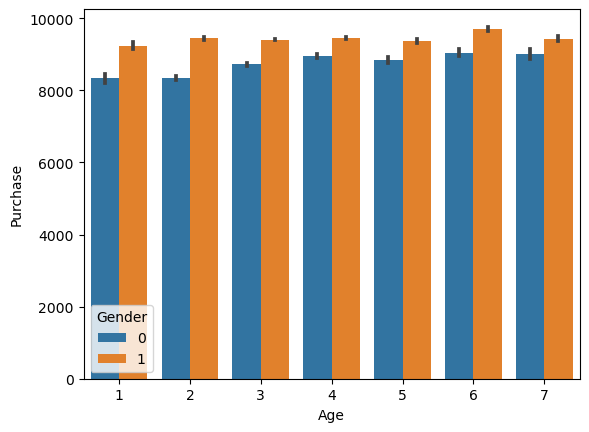

In [21]:
sns.barplot(x='Age' , y='Purchase' , data=df , hue='Gender')
plt.show()

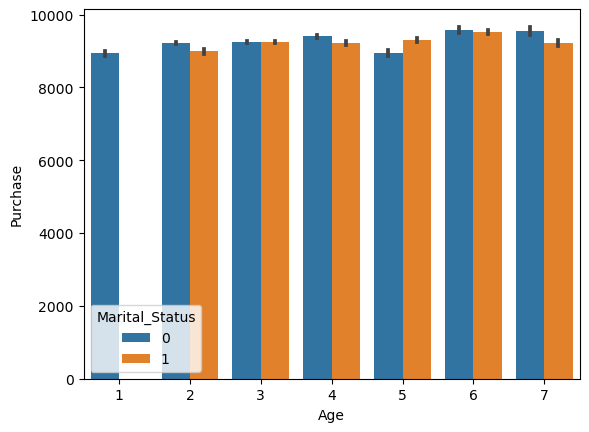

In [22]:
sns.barplot(x='Age' , y='Purchase' , data=df , hue='Marital_Status')
plt.show()

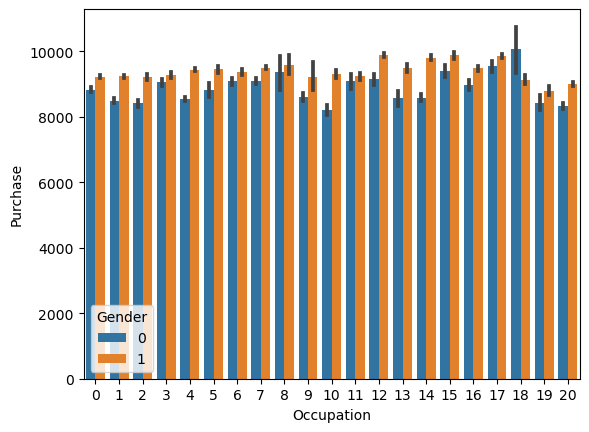

In [26]:
sns.barplot(x='Occupation' , y='Purchase' , data=df , hue='Gender')
plt.Figure(figsize=(10,10))
plt.show()

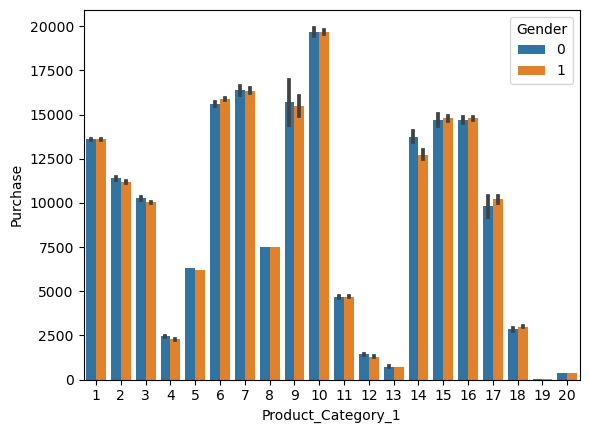

In [27]:
sns.barplot(x='Product_Category_1' , y='Purchase' , data=df , hue='Gender')
plt.Figure(figsize=(10,10))
plt.show()

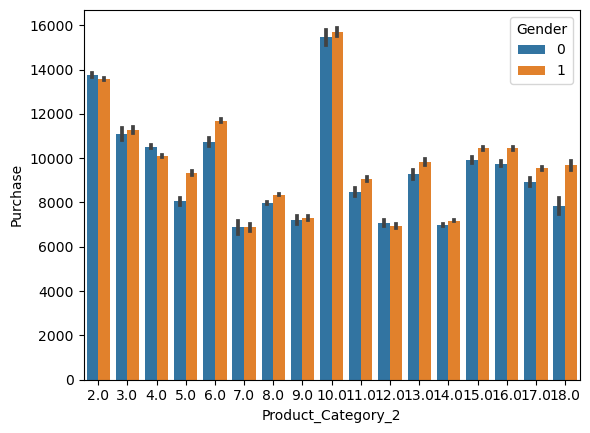

In [28]:
sns.barplot(x='Product_Category_2' , y='Purchase' , data=df , hue='Gender')
plt.Figure(figsize=(10,10))
plt.show()

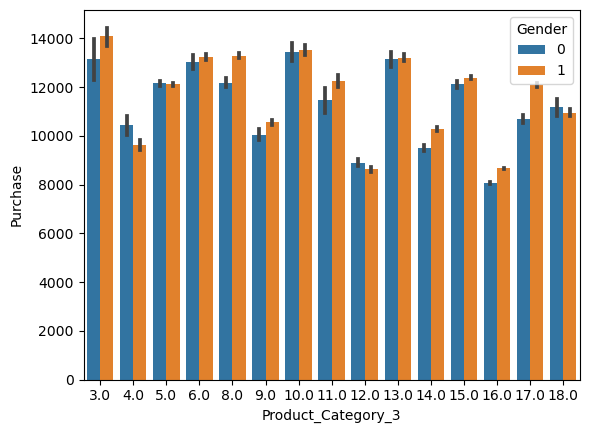

In [29]:
sns.barplot(x='Product_Category_3' , y='Purchase' , data=df , hue='Gender')
plt.Figure(figsize=(10,10))
plt.show()

### Feature Scaling

In [31]:
df_test = df[df['Purchase'].isnull()]
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [32]:
df_train = df[~df['Purchase'].isnull()]
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [34]:
x = df_train.drop('Purchase' , axis=1)
y = df_train['Purchase']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [38]:
X_test.drop(['Product_ID'] , axis=1 , inplace=True)
X_train.drop(['Product_ID'] , axis=1 , inplace=True)

# <h1><center>❤️Thank You❤️</center></h1>